In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

C:\David\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# define the nn layer
def add_layer(data, n_features, n_units, activation = None):
    W = tf.Variable(tf.random_normal([n_features,n_units]))
    Bias = tf.Variable(tf.ones([1, n_units])/5)
    Wx_plus_b = tf.matmul(data,W) + Bias
    
    if activation == None:
        return Wx_plus_b
    else:
        return activation(Wx_plus_b)
    
# define a fun to compute the accruacy
def compute_accuracy(x_train, y_train):
    predict_prob = sess.run(output, feed_dict = {xs:x_train})
    compare = tf.equal(tf.argmax(predict_prob,1),tf.argmax(y_train,1))
    result = tf.reduce_mean(tf.cast(compare, tf.float32)) # use cast to change the dtype
    return sess.run(result, feed_dict = {xs:x_train, ys:y_train})*100

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


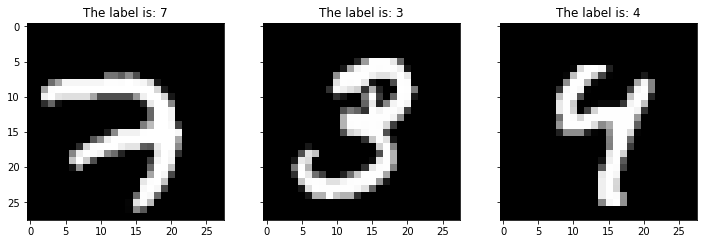

In [3]:
digits = input_data.read_data_sets("MNIST_data", one_hot = True)

# plot the top3 digits
fig, axes = plt.subplots(1,3, sharex='all', sharey='all')
fig.set_figheight(4), fig.set_figwidth(12)
for i in range(3):
    axes[i].set_title("The label is: {}".format(digits.train.labels[i,:].argmax()))
    axes[i].imshow(digits.train.images[i,:].reshape(28,28), cmap = plt.cm.Greys_r)
    
plt.show()

In [4]:
xs = tf.placeholder(tf.float32, [None,784]) # 784 = 28X28
ys = tf.placeholder(tf.float32, [None, 10]) # one-hot encoding
# the structure of NN
hidden= add_layer(xs, 784, 100, activation= tf.nn.sigmoid)
output = add_layer(hidden, 100,10, activation=tf.nn.softmax)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(output)))

train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(cross_entropy)

init = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init)

for i in range(30000):
    batch_x, batch_y = digits.train.next_batch(100) # gradient is computed by grouping 100 samples per time 
    sess.run(train_step, feed_dict = {xs:batch_x, ys:batch_y})
    if i % 2000 == 0:
        print("the loss = {}".format(sess.run(cross_entropy, feed_dict = {xs:batch_x, ys:batch_y})))
        print("the accuracy = {:.2f}".format(compute_accuracy(digits.train.images,digits.train.labels)))
        print("----------------------------------------------------------")

the loss = 973.4775390625
the accuracy = 11.44
----------------------------------------------------------
the loss = 173.63204956054688
the accuracy = 57.17
----------------------------------------------------------
the loss = 126.32136535644531
the accuracy = 68.56
----------------------------------------------------------
the loss = 75.9465103149414
the accuracy = 73.59
----------------------------------------------------------
the loss = 76.83830261230469
the accuracy = 76.72
----------------------------------------------------------
the loss = 79.24899291992188
the accuracy = 78.81
----------------------------------------------------------
the loss = 77.22227478027344
the accuracy = 80.26
----------------------------------------------------------
the loss = 59.20906448364258
the accuracy = 81.48
----------------------------------------------------------
the loss = 72.70086669921875
the accuracy = 82.47
----------------------------------------------------------
the loss = 41.3667907